In [1]:
import os
os.getcwd()

'/Users/marko/dev/rl-trading-ex/notebooks'

In [2]:
os.chdir("..")
os.getcwd()

'/Users/marko/dev/rl-trading-ex'

In [3]:
from src.data import get_data
from src.agent_ddpg import DDPG
from src.agent_ddqn import DDQN
from src.env_port import PortfolioAllocationEnv
from src.env_stock import StockTradingEnv
from src.utils import plot_env

In [4]:
import os
import warnings
import yaml

In [5]:
# Select which model/related env to use here

model_name = "ddqn"

In [6]:
with open("params.yml") as f:
    params = yaml.safe_load(f)

In [7]:
data_path = params["config"]["data_path"]
train_path = data_path + "/train.csv"
test_path = data_path + "/test.csv"

In [8]:
df_train, df_test = get_data(train_path=train_path, test_path=test_path, scaling=False)

[X] Ooops!!! It's True, the series 'high' was not found in Date, S&P Index, ETF Price, RSI_14
[X] Ooops!!! It's True, the series 'low' was not found in Date, S&P Index, ETF Price, RSI_14
(1225, 11)
[X] Ooops!!! It's True, the series 'high' was not found in Date, S&P Index, ETF Price, RSI_14
[X] Ooops!!! It's True, the series 'low' was not found in Date, S&P Index, ETF Price, RSI_14
(217, 11)


In [9]:
if model_name == "ddqn":
    env_config = params["env"]["stock"]
    env_train = StockTradingEnv(df=df_train, config=env_config)
    env_test = StockTradingEnv(df=df_test, config=env_config)

    model_config = params["train"]["ddqn"]
    model = DDQN(config=model_config)

elif model_name == "ddpg":
    env_config = params["env"]["portfolio"]
    env_train = PortfolioAllocationEnv(df=df_train, config=env_config)
    env_test = PortfolioAllocationEnv(df=df_test, config=env_config)

    model_config = params["train"]["ddpg"]
    model = DDPG(config=model_config)

else:
    raise ValueError("Invalid model selection -- valid values are ddqn/ddpg.")

In [10]:
_ = model.train(env_train)

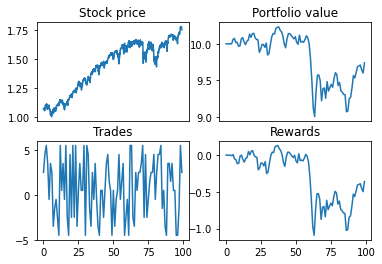

In [11]:
plot_env(env_train)

In [12]:
_ = model.test(env_test)

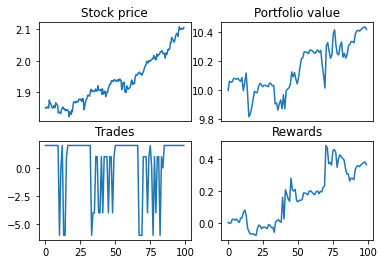

In [13]:
plot_env(env_test)